In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV,train_test_split
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
data = pd.read_csv("bodyfat.csv")
data.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


# Data featuring and Cleaning


In [3]:
data.isnull().sum()

Density    0
BodyFat    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
dtype: int64

<AxesSubplot:>

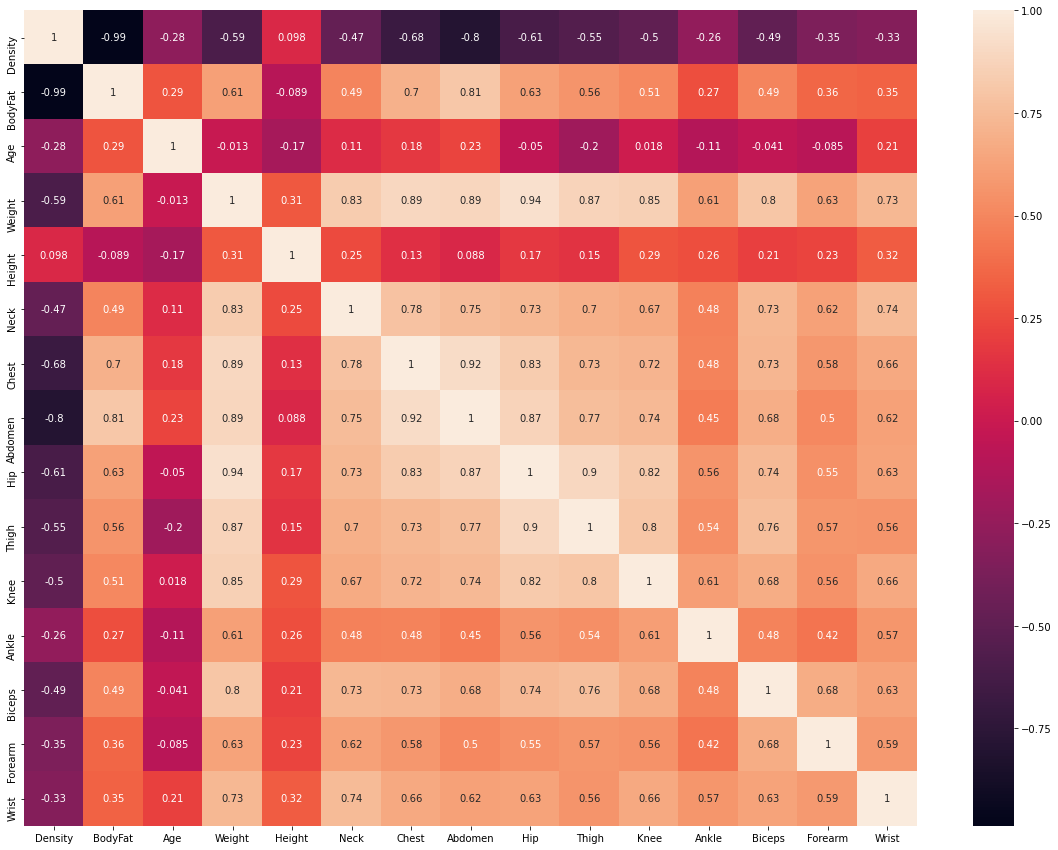

In [4]:
import seaborn as sns 
plt.figure(figsize = (20,15))
sns.heatmap(data.corr(),annot = True)

In [5]:
dat = 0 
epp = []
col = data.columns
for i in col:
    for j in col:
        dat = data[i].corr(data[j])
        if dat > 0.4:
            epp.append([i,j])
print(epp)
print(len(epp))

[['Density', 'Density'], ['BodyFat', 'BodyFat'], ['BodyFat', 'Weight'], ['BodyFat', 'Neck'], ['BodyFat', 'Chest'], ['BodyFat', 'Abdomen'], ['BodyFat', 'Hip'], ['BodyFat', 'Thigh'], ['BodyFat', 'Knee'], ['BodyFat', 'Biceps'], ['Age', 'Age'], ['Weight', 'BodyFat'], ['Weight', 'Weight'], ['Weight', 'Neck'], ['Weight', 'Chest'], ['Weight', 'Abdomen'], ['Weight', 'Hip'], ['Weight', 'Thigh'], ['Weight', 'Knee'], ['Weight', 'Ankle'], ['Weight', 'Biceps'], ['Weight', 'Forearm'], ['Weight', 'Wrist'], ['Height', 'Height'], ['Neck', 'BodyFat'], ['Neck', 'Weight'], ['Neck', 'Neck'], ['Neck', 'Chest'], ['Neck', 'Abdomen'], ['Neck', 'Hip'], ['Neck', 'Thigh'], ['Neck', 'Knee'], ['Neck', 'Ankle'], ['Neck', 'Biceps'], ['Neck', 'Forearm'], ['Neck', 'Wrist'], ['Chest', 'BodyFat'], ['Chest', 'Weight'], ['Chest', 'Neck'], ['Chest', 'Chest'], ['Chest', 'Abdomen'], ['Chest', 'Hip'], ['Chest', 'Thigh'], ['Chest', 'Knee'], ['Chest', 'Ankle'], ['Chest', 'Biceps'], ['Chest', 'Forearm'], ['Chest', 'Wrist'], ['Abd

In [6]:
res = []
for i in epp:
    o = [i[1], i[0]]
    if i[0] != i[1] and i  not in res and o not in res :
        res.append(i)
print(res)
print(len(res))

[['BodyFat', 'Weight'], ['BodyFat', 'Neck'], ['BodyFat', 'Chest'], ['BodyFat', 'Abdomen'], ['BodyFat', 'Hip'], ['BodyFat', 'Thigh'], ['BodyFat', 'Knee'], ['BodyFat', 'Biceps'], ['Weight', 'Neck'], ['Weight', 'Chest'], ['Weight', 'Abdomen'], ['Weight', 'Hip'], ['Weight', 'Thigh'], ['Weight', 'Knee'], ['Weight', 'Ankle'], ['Weight', 'Biceps'], ['Weight', 'Forearm'], ['Weight', 'Wrist'], ['Neck', 'Chest'], ['Neck', 'Abdomen'], ['Neck', 'Hip'], ['Neck', 'Thigh'], ['Neck', 'Knee'], ['Neck', 'Ankle'], ['Neck', 'Biceps'], ['Neck', 'Forearm'], ['Neck', 'Wrist'], ['Chest', 'Abdomen'], ['Chest', 'Hip'], ['Chest', 'Thigh'], ['Chest', 'Knee'], ['Chest', 'Ankle'], ['Chest', 'Biceps'], ['Chest', 'Forearm'], ['Chest', 'Wrist'], ['Abdomen', 'Hip'], ['Abdomen', 'Thigh'], ['Abdomen', 'Knee'], ['Abdomen', 'Ankle'], ['Abdomen', 'Biceps'], ['Abdomen', 'Forearm'], ['Abdomen', 'Wrist'], ['Hip', 'Thigh'], ['Hip', 'Knee'], ['Hip', 'Ankle'], ['Hip', 'Biceps'], ['Hip', 'Forearm'], ['Hip', 'Wrist'], ['Thigh', 'Kn

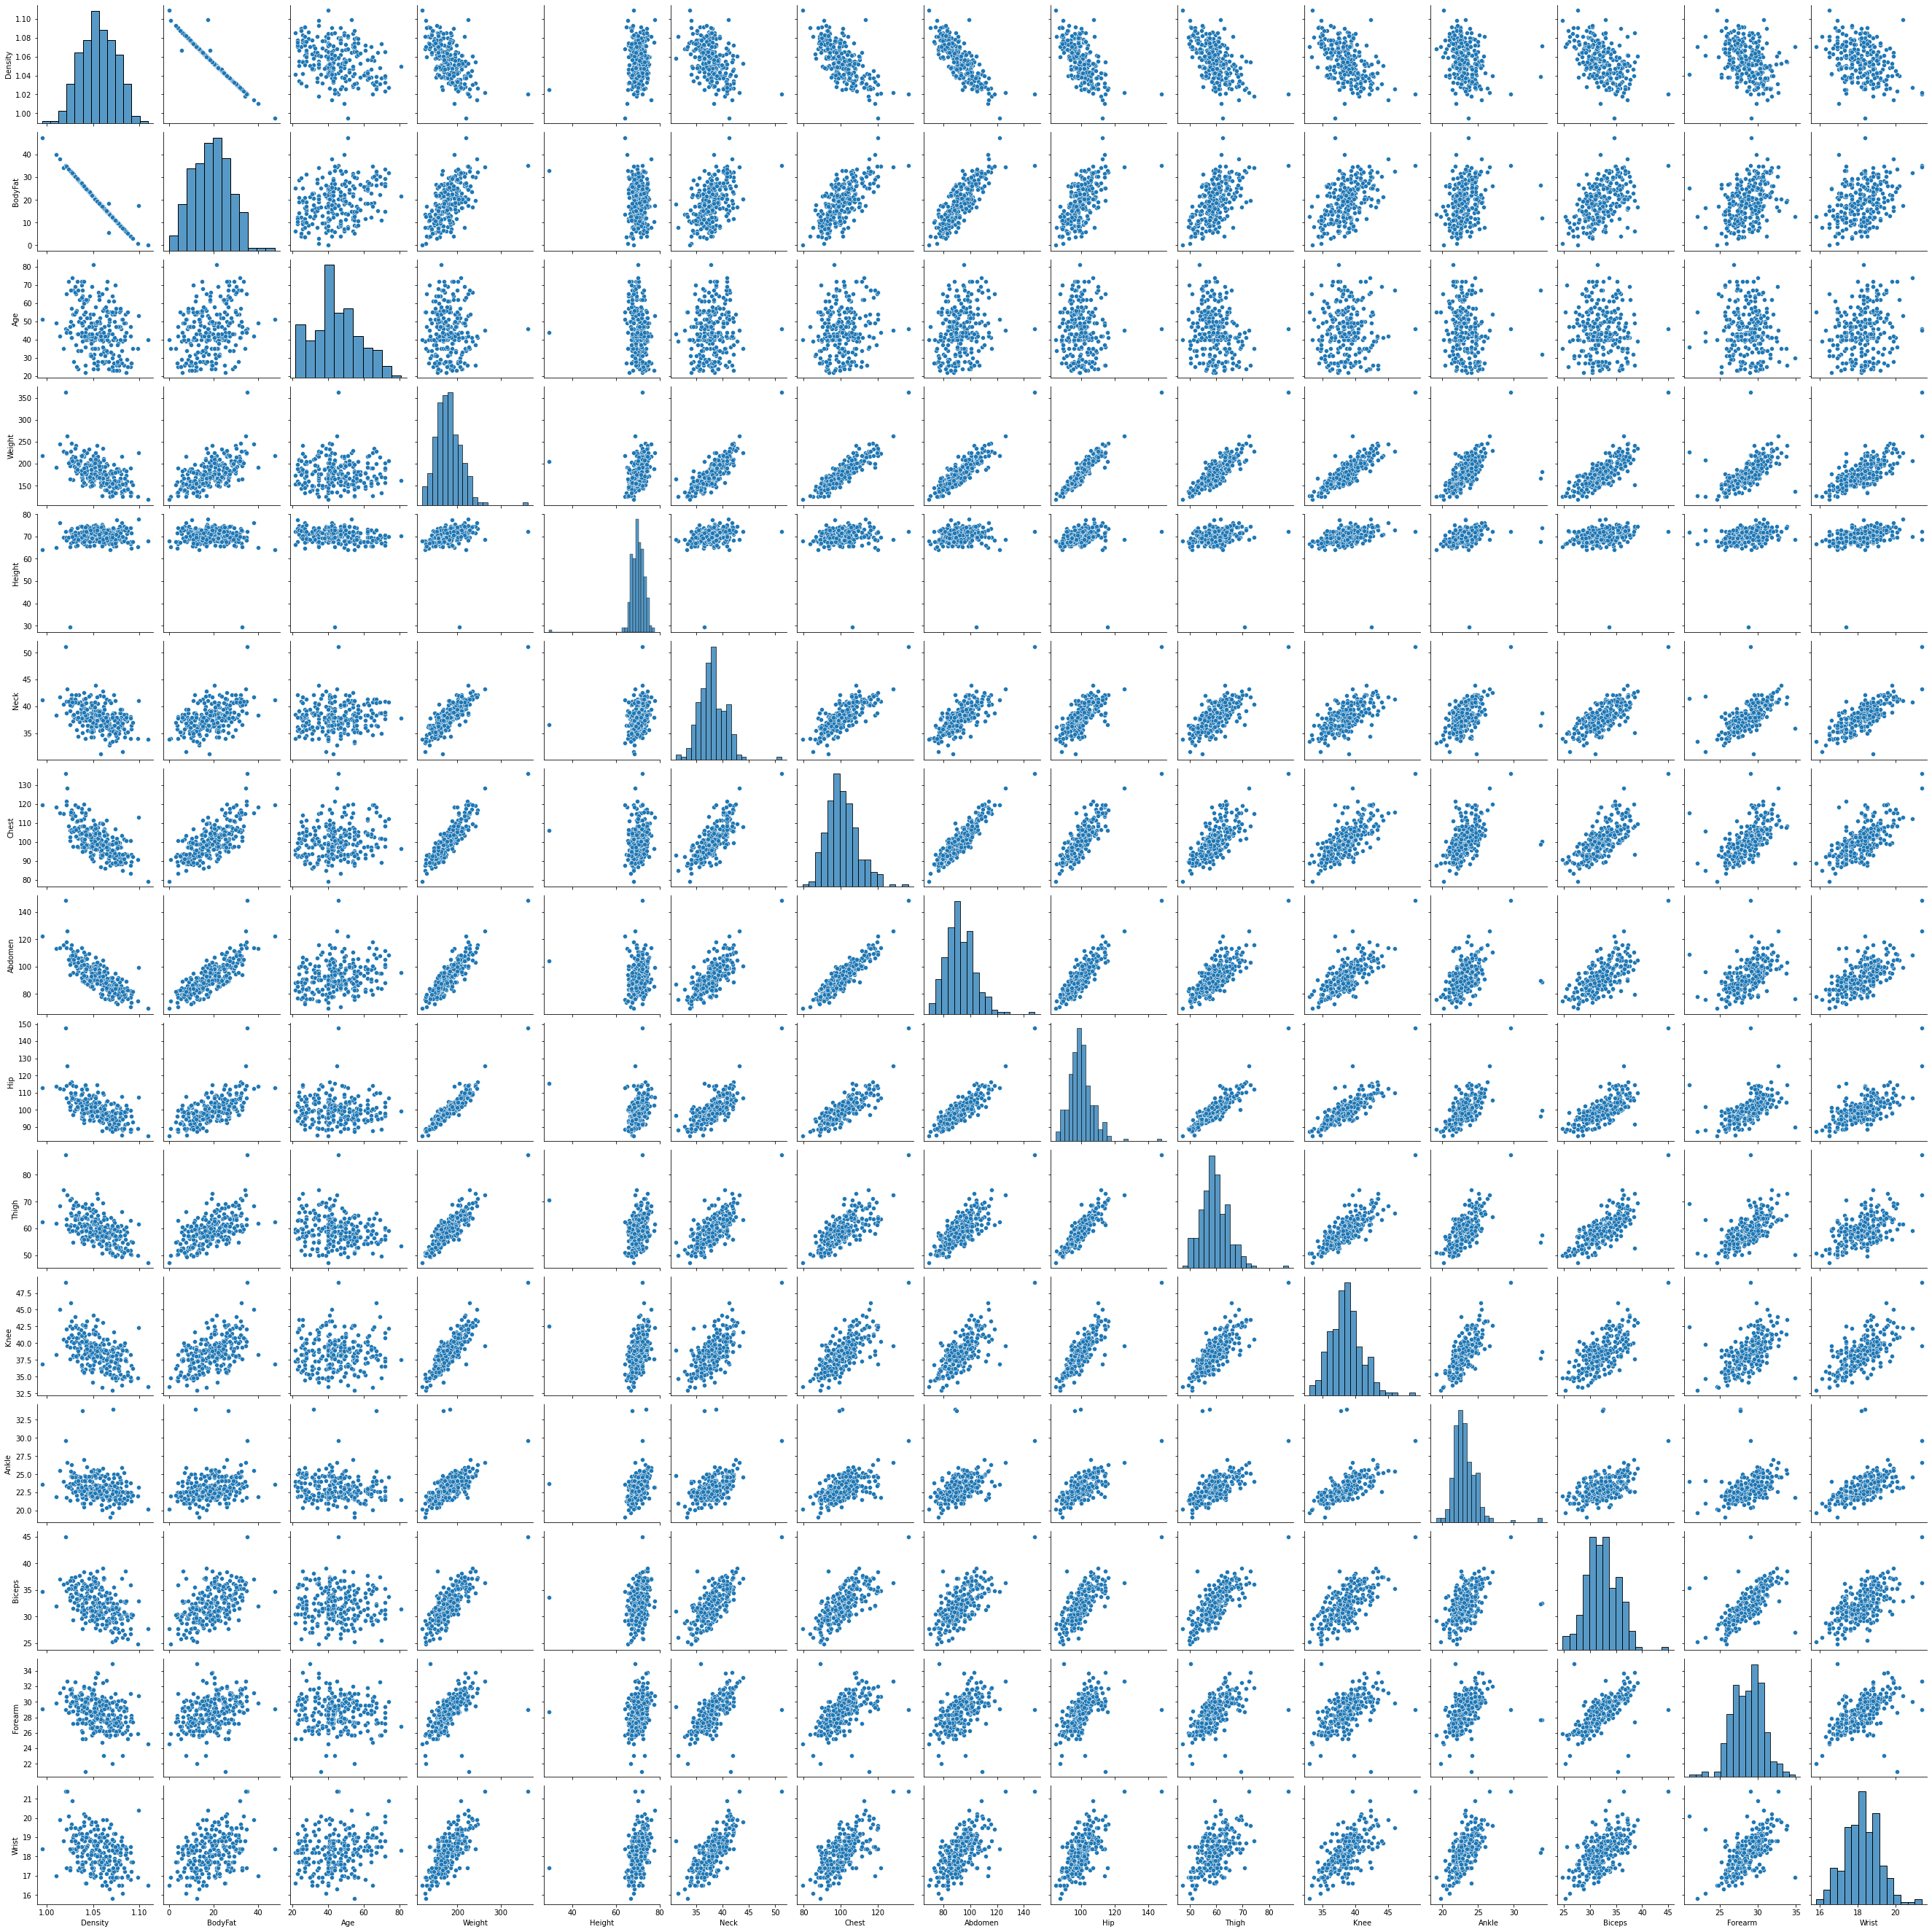

In [7]:
sns.pairplot(data)

# data spliting

In [8]:
x = data.drop(["Density","BodyFat"], axis = 1)
y = data.BodyFat
y1 = data.Density


In [9]:
x.head()

,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [10]:
y.head()

0    12.3
1     6.1
2    25.3
3    10.4
4    28.7
Name: BodyFat, dtype: float64

In [11]:
y1.head()

0    1.0708
1    1.0853
2    1.0414
3    1.0751
4    1.0340
Name: Density, dtype: float64

In [12]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.35,random_state = 78)
print(len(xtrain), len(xtest))
print(len(ytrain), len(ytest))

163 89
163 89


In [47]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
stdsc.fit(xtrain)
xtrain = stdsc.transform(xtrain)
xtest = stdsc.transform(xtest)

# feature importance

In [14]:
rfr = RandomForestRegressor()
rfr.fit(xtrain,ytrain)
ypred = rfr.predict(xtest)
print(rfr.score(xtest,ytest))

0.6877731705639474


In [15]:
rfr.feature_importances_

array([0.02735454, 0.01707685, 0.04199048, 0.02015402, 0.04264044,
       0.6971539 , 0.01838803, 0.02861315, 0.01833054, 0.02711314,
       0.01626357, 0.02196807, 0.02295329])

<AxesSubplot:>

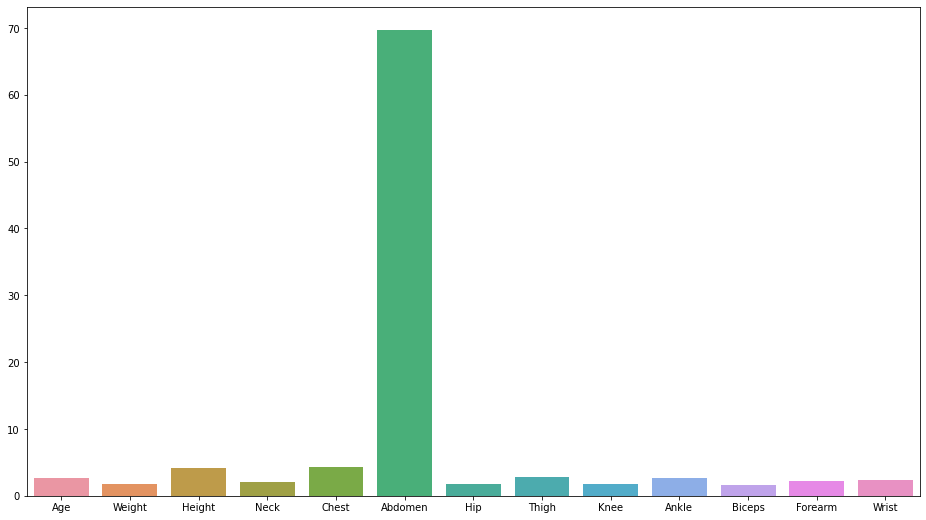

In [16]:
plt.figure(figsize = (16,9))
sns.barplot(x = x.columns,y = rfr.feature_importances_*100)

# Model training and hyperparameter optimisations

# Linear Regression

In [17]:
lr = LinearRegression()
lr.fit(xtrain,ytrain)
ypredlr = lr.predict(xtest)
print(" score = {}".format(lr.score(xtrain,ytrain)))
print(" score = {}".format(lr1.score(xtest,ytest)))
print("r2 score = {}".format(r2_score(ypredlr,ytest)))
print("mean squared error = {}".format(mean_squared_error(ypredlr,ytest)))

 score = 0.740112396585213
r2 score = 0.5665042168877443
mean squared error = 19.65389319338479


In [18]:
lr1 = LinearRegression(fit_intercept=True,
    normalize=True)
lr1.fit(xtrain,ytrain)
ypredlr1 = lr1.predict(xtest)
print(" score = {}".format(lr1.score(xtrain,ytrain)))
print(" score = {}".format(lr1.score(xtest,ytest)))
print("r2 score = {}".format(r2_score(ypredlr1,ytest)))
print("mean squared error = {}".format(mean_squared_error(ypredlr1,ytest)))

 score = 0.740112396585213
r2 score = 0.566504216887749
mean squared error = 19.653893193384732


D:\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BodyFat', ylabel='Density'>

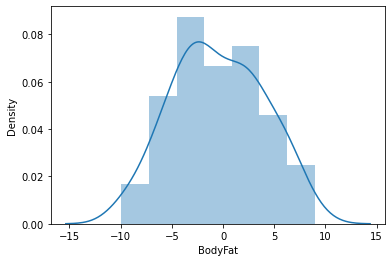

In [19]:
sns.distplot(ytest-ypredlr)

# Random Forest

In [20]:
rf = RandomForestRegressor( n_estimators=200,
    criterion='mse',
    max_depth=5,
    min_samples_split=4,
    min_samples_leaf=5)
rf.fit(xtrain,ytrain)
rfpred = rf.predict(xtest)
print(" score = {}".format(rf.score(xtrain,ytrain)))
print(" score = {}".format(rf.score(xtest,ytest)))
print("r2 score = {}".format(r2_score(rfpred,ytest)))
print("mean squared error = {}".format(mean_squared_error(rfpred,ytest)))

 score = 0.8488231965046921
 score = 0.6889254909865588
r2 score = 0.42521759512443624
mean squared error = 23.712327377426334


D:\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BodyFat', ylabel='Density'>

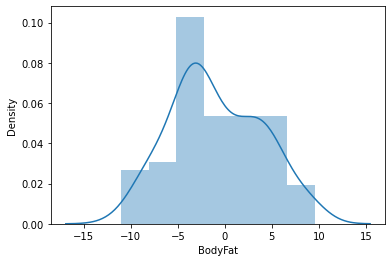

In [21]:
sns.distplot(ytest-rfpred)

In [22]:
ytest,rfpred

(198     6.6
 244    29.0
 140    24.9
 95     17.4
 159    22.5
        ... 
 46     10.8
 113    21.3
 18     16.0
 67     13.8
 180    26.6
 Name: BodyFat, Length: 89, dtype: float64,
 array([ 8.65169858, 29.57278063, 21.24790953, 24.70726864, 19.6102617 ,
        23.07684158, 30.6642746 , 27.20261754, 11.9317942 , 20.7473779 ,
        20.98291334, 23.51082496, 18.6605985 , 13.6735404 ,  8.2944569 ,
        12.06008768, 17.27838375, 24.57392673,  9.80542531, 10.55280867,
        17.53793679, 10.50618566, 36.19205298, 28.42113202, 25.26759612,
        26.26313019,  9.68070194, 20.37851272, 12.33989116, 19.66911471,
        18.8611145 , 18.98031618, 20.51914558, 25.7102897 , 20.30176304,
        19.90134511, 17.87182924, 17.31359025, 21.81582851, 20.81640645,
        20.52848006, 22.5957914 , 20.79804262, 10.29500978, 10.46133894,
        14.63509917, 11.00285227, 20.09462759, 28.39876693, 24.89978505,
        22.80608048, 25.31538507, 27.80615028, 21.8054979 , 25.51185066,
        13

# hyperparameter optimisation

In [41]:
import numpy as np
rf1 = RandomForestRegressor()
params = {"n_estimators": [100,200,300,400,500,600,700,800,900,1000,1100,1200],
          "criterion": ["mse", "mae"],
          "max_depth": [int(x) for x in np.linspace(1,200,20)],
         "min_samples_split": [0,1,3,5,7,9,11,13,15],
          "max_features" : ["auto", "sqrt", "log2"],
         }
random = RandomizedSearchCV(estimator = rf1,param_distributions = params,n_iter = 100,cv = 4,verbose = 3,n_jobs = -1)
random.fit(xtrain,ytrain)

Fitting 4 folds for each of 100 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   26.7s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  4.4min finished


RandomizedSearchCV(cv=4, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['mse', 'mae'],
                                        'max_depth': [1, 11, 21, 32, 42, 53, 63,
                                                      74, 84, 95, 105, 116, 126,
                                                      137, 147, 158, 168, 179,
                                                      189, 200],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_split': [0, 1, 3, 5, 7, 9,
                                                              11, 13, 15],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
 

In [42]:
random.best_params_

{'n_estimators': 100,
 'min_samples_split': 9,
 'max_features': 'auto',
 'max_depth': 21,
 'criterion': 'mse'}

In [43]:
random.best_score_

0.6684480282882246

In [26]:
#params1 = {"n_estimators": [100,200,300,400],
#          "criterion": ["mse", "mae"],
#          "max_depth": [1,5,7,9,11,13,15,20],
#          "min_samples_split": [0,1,3,5,7,9,11,13,15],
#          "max_features" : ["auto", "sqrt", "log2"],
#          "min_samples_leaf" : [1,3,6,7,8,9]
#         }
#grid = GridSearchCV(estimator = rf,param_grid = params1,verbose = 3,n_jobs = -1 )
#grid.fit(xtest,ytest)

In [27]:
#grid.best_score_

In [28]:
#grid_rf = grid.best_estimator_
#grid_rf.fit(xtrain,ytrain)
#grid_rf_pred = grid_rf.predict(xtest)
#print(r2_score(ytest,grid_rf_pred))
#print(grid_rf.score(xtest,ytest))
#print(grid_rf.score(xtrain,ytrain))

# gradient boost


In [29]:
gbr = GradientBoostingRegressor(
    loss='ls',
    learning_rate=0.1,
    n_estimators=100,
    criterion='friedman_mse',
    min_samples_split=2,
    min_samples_leaf=1,
    max_depth=3,
    max_features="auto",
    verbose=0,
    max_leaf_nodes=None,
)
gbr.fit(xtrain,ytrain)
ypred_gbr = gbr.predict(xtest)
print(" score = {}".format(gbr.score(xtrain,ytrain)))
print(" score = {}".format(gbr.score(xtest,ytest)))
print("r2 score = {}".format(r2_score(ypred_gbr,ytest)))
print("mean squared error = {}".format(mean_squared_error(ypred_gbr,ytest)))

 score = 0.983520453648158
 score = 0.6733134375272639
r2 score = 0.48053346718134626
mean squared error = 24.902389924932226


D:\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BodyFat', ylabel='Density'>

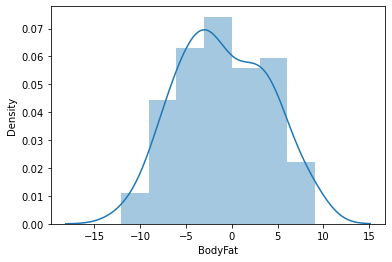

In [30]:
sns.distplot(ytest-ypred_gbr)

# Hyperparameter optimisation

In [31]:
gb = GradientBoostingRegressor()
params1 = {"n_estimators": [100,200,300,400,500,600,700,800,900,1000,1100,1200],
           "loss" :  ['ls', 'lad', 'huber', 'quantile'],
    "learning_rate" :[0.1,0.2],
    "criterion" : ['friedman_mse', 'mse', 'mae'],
    "min_samples_split" : [3,5,7,9,4,11],
    "min_samples_leaf" : [3,5,7,6,9,11,13],
    "max_depth" : [3,5,7,9,11,15],
    "max_features" :['auto', 'sqrt', 'log2'],
     "max_leaf_nodes" : [3,5,7,9,2,4,11,13]
         }
random1 = RandomizedSearchCV(estimator = gb,param_distributions = params1,n_iter = 150,cv = 4,verbose = 3,n_jobs = -1)
random1.fit(xtrain,ytrain)

Fitting 4 folds for each of 150 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   25.6s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  6.2min finished


RandomizedSearchCV(cv=4, estimator=GradientBoostingRegressor(), n_iter=150,
                   n_jobs=-1,
                   param_distributions={'criterion': ['friedman_mse', 'mse',
                                                      'mae'],
                                        'learning_rate': [0.1, 0.2],
                                        'loss': ['ls', 'lad', 'huber',
                                                 'quantile'],
                                        'max_depth': [3, 5, 7, 9, 11, 15],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'max_leaf_nodes': [3, 5, 7, 9, 2, 4, 11,
                                                           13],
                                        'min_samples_leaf': [3, 5, 7, 6, 9, 11,
                                                             13],
                                        'min_sam

In [32]:
random1.best_params_

{'n_estimators': 100,
 'min_samples_split': 9,
 'min_samples_leaf': 7,
 'max_leaf_nodes': 4,
 'max_features': 'auto',
 'max_depth': 9,
 'loss': 'ls',
 'learning_rate': 0.1,
 'criterion': 'mse'}

In [33]:
random1.best_score_

0.6679378090597956

In [34]:
 random1.best_estimator_

GradientBoostingRegressor(criterion='mse', max_depth=9, max_features='auto',
                          max_leaf_nodes=4, min_samples_leaf=7,
                          min_samples_split=9)

In [35]:
sns.distplot(ytest-yy)

NameError: name 'yy' is not defined

# adaboost regressor

In [39]:
from sklearn.ensemble import AdaBoostRegressor
ada =  AdaBoostRegressor()
lr1 = { 'n_estimators':[0,100,150,200,250,300,350],
    'learning_rate':[0.1,0.3,0.5,0.7,0.9,1.0],
     'loss' : ['linear', 'square', 'exponential'] }
random10 = RandomizedSearchCV(estimator =ada ,param_distributions=lr1 , cv =10 , n_iter = 10, verbose =2)
random10.fit(xtest,ytest)
print(random10.best_estimator_)
print(random10.best_params_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] n_estimators=100, loss=exponential, learning_rate=1.0 ...........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=100, loss=exponential, learning_rate=1.0, total=   0.2s
[CV] n_estimators=100, loss=exponential, learning_rate=1.0 ...........
[CV]  n_estimators=100, loss=exponential, learning_rate=1.0, total=   0.2s
[CV] n_estimators=100, loss=exponential, learning_rate=1.0 ...........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  n_estimators=100, loss=exponential, learning_rate=1.0, total=   0.2s
[CV] n_estimators=100, loss=exponential, learning_rate=1.0 ...........
[CV]  n_estimators=100, loss=exponential, learning_rate=1.0, total=   0.2s
[CV] n_estimators=100, loss=exponential, learning_rate=1.0 ...........
[CV]  n_estimators=100, loss=exponential, learning_rate=1.0, total=   0.2s
[CV] n_estimators=100, loss=exponential, learning_rate=1.0 ...........
[CV]  n_estimators=100, loss=exponential, learning_rate=1.0, total=   0.3s
[CV] n_estimators=100, loss=exponential, learning_rate=1.0 ...........
[CV]  n_estimators=100, loss=exponential, learning_rate=1.0, total=   0.2s
[CV] n_estimators=100, loss=exponential, learning_rate=1.0 ...........
[CV]  n_estimators=100, loss=exponential, learning_rate=1.0, total=   0.2s
[CV] n_estimators=100, loss=exponential, learning_rate=1.0 ...........
[CV]  n_estimators=100, loss=exponential, learning_rate=1.0, total=   0.2s
[CV] n_estimators=100, loss=exponential, learning

[CV] . n_estimators=150, loss=linear, learning_rate=1.0, total=   0.3s
[CV] n_estimators=200, loss=square, learning_rate=0.1 ................
[CV] . n_estimators=200, loss=square, learning_rate=0.1, total=   0.3s
[CV] n_estimators=200, loss=square, learning_rate=0.1 ................
[CV] . n_estimators=200, loss=square, learning_rate=0.1, total=   0.4s
[CV] n_estimators=200, loss=square, learning_rate=0.1 ................
[CV] . n_estimators=200, loss=square, learning_rate=0.1, total=   0.3s
[CV] n_estimators=200, loss=square, learning_rate=0.1 ................
[CV] . n_estimators=200, loss=square, learning_rate=0.1, total=   0.4s
[CV] n_estimators=200, loss=square, learning_rate=0.1 ................
[CV] . n_estimators=200, loss=square, learning_rate=0.1, total=   0.4s
[CV] n_estimators=200, loss=square, learning_rate=0.1 ................
[CV] . n_estimators=200, loss=square, learning_rate=0.1, total=   0.4s
[CV] n_estimators=200, loss=square, learning_rate=0.1 ................
[CV] .

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 1007, in fit
    return super().fit(X, y, sample_weight)
  File "D:\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 117, in fit
    self._validate_estimator()
  File "D:\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 1011, in _validate_estimator
    super()._validate_estimator(
  File "D:\Anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 134, in _validate_estimator
    raise ValueError("n_estimators must be greater than zero, "
ValueError: n_estimators mu

[CV] . n_estimators=350, loss=linear, learning_rate=0.7, total=   0.8s
[CV] n_estimators=350, loss=linear, learning_rate=0.7 ................
[CV] . n_estimators=350, loss=linear, learning_rate=0.7, total=   0.7s
[CV] n_estimators=350, loss=linear, learning_rate=0.7 ................
[CV] . n_estimators=350, loss=linear, learning_rate=0.7, total=   0.8s
[CV] n_estimators=350, loss=linear, learning_rate=0.7 ................
[CV] . n_estimators=350, loss=linear, learning_rate=0.7, total=   0.6s
[CV] n_estimators=350, loss=linear, learning_rate=0.7 ................
[CV] . n_estimators=350, loss=linear, learning_rate=0.7, total=   0.7s
[CV] n_estimators=350, loss=linear, learning_rate=0.7 ................
[CV] . n_estimators=350, loss=linear, learning_rate=0.7, total=   0.6s
[CV] n_estimators=350, loss=linear, learning_rate=0.7 ................
[CV] . n_estimators=350, loss=linear, learning_rate=0.7, total=   0.7s
[CV] n_estimators=350, loss=linear, learning_rate=0.7 ................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   40.3s finished


AdaBoostRegressor(learning_rate=0.1, loss='exponential', n_estimators=200)
{'n_estimators': 200, 'loss': 'exponential', 'learning_rate': 0.1}


In [40]:
random10.best_score_

0.671916979206486

D:\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BodyFat', ylabel='Density'>

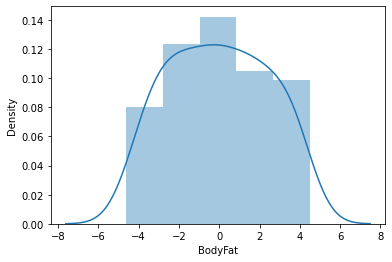

In [44]:
rf = random10.best_estimator_
yyy=rf.predict(xtest)
sns.distplot(ytest-yyy)

# Model saving

In [46]:
import pickle as pkl
pkl.dump(rf,open("bmi_model",'wb'))
pkl.dump(sdtsc,open("Data_transforming_model",'wb'))

In [56]:
data.iloc[45]

Density      1.067
BodyFat     13.900
Age         43.000
Weight     164.250
Height      73.250
Neck        35.700
Chest       96.600
Abdomen     81.500
Hip         97.200
Thigh       58.400
Knee        38.200
Ankle       23.400
Biceps      29.700
Forearm     27.400
Wrist       18.300
Name: 45, dtype: float64